**Studi Kasus 8: Laporan Penjualan Supermarket**

**Skenario & Data:**

- Anda adalah analis data di sebuah supermarket. Anda punya data dari kasir di dua tabel terpisah:

- df_transaksi: Ini adalah catatan setiap barang yang terjual (SKU, jumlah, dan ID transaksi).
- df_produk: Ini adalah "kamus" produk (SKU, nama produk, dan harganya).
- Tugas Anda adalah menggabungkan data ini untuk mencari tahu berapa total pendapatan (omzet) per produk.

----

In [1]:
import pandas as pd
import numpy as np

# Tabel 1: Catatan Transaksi
data_transaksi = {
    'id_transaksi': ['T001', 'T001', 'T002', 'T003', 'T004', 'T005'],
    'sku': ['SKU-A', 'SKU-B', 'SKU-A', 'SKU-C', 'SKU-D', 'SKU-A'],
    'jumlah_terjual': [1, 2, 3, 5, 1, 2]
}
df_transaksi = pd.DataFrame(data_transaksi)

# Tabel 2: Daftar Produk (Kamus)
data_produk = {
    'sku_produk': ['SKU-A', 'SKU-B', 'SKU-C', 'SKU-E'], # Perhatikan SKU-nya
    'nama_produk': ['Roti Tawar', 'Susu UHT', 'Kopi Bubuk', 'Biskuit'],
    'harga_satuan': [15000, 20000, 25000, 12000]
}
df_produk = pd.DataFrame(data_produk)

# Tampilkan kedua DataFrame
print("--- Transaksi ---")
print(df_transaksi)
print("\n--- Daftar Produk ---")
print(df_produk)

--- Transaksi ---
  id_transaksi    sku  jumlah_terjual
0         T001  SKU-A               1
1         T001  SKU-B               2
2         T002  SKU-A               3
3         T003  SKU-C               5
4         T004  SKU-D               1
5         T005  SKU-A               2

--- Daftar Produk ---
  sku_produk nama_produk  harga_satuan
0      SKU-A  Roti Tawar         15000
1      SKU-B    Susu UHT         20000
2      SKU-C  Kopi Bubuk         25000
3      SKU-E     Biskuit         12000


----

- Bagaimana cara Anda menggabungkan df_transaksi dan df_produk?
- Kita ingin membuat tabel laporan yang berisi semua transaksi yang tercatat (df_transaksi) dan dilengkapi dengan nama_produk serta harga_satuan dari df_produk


In [ ]:
all_transactions = df_transaksi.merge(df_produk, left_on='sku', right_on='sku_produk', how='left')
print("\n--- Semua Transaksi dengan Detail Produk ---")
print(all_transactions)


--- Semua Transaksi dengan Detail Produk ---
  id_transaksi    sku  jumlah_terjual sku_produk nama_produk  harga_satuan
0         T001  SKU-A               1      SKU-A  Roti Tawar       15000.0
1         T001  SKU-B               2      SKU-B    Susu UHT       20000.0
2         T002  SKU-A               3      SKU-A  Roti Tawar       15000.0
3         T003  SKU-C               5      SKU-C  Kopi Bubuk       25000.0
4         T004  SKU-D               1        NaN         NaN           NaN
5         T005  SKU-A               2      SKU-A  Roti Tawar       15000.0


---

**2: Menghitung Omzet**

- Oke, sekarang kita punya tabel all_transactions yang hampir sempurna, tapi ada NaN.
- Tugas Kamu:
- Hitung Subtotal: Buat satu kolom baru bernama subtotal di all_transactions. Isinya adalah jumlah_terjual dikali harga_satuan.
- Tangani NaN: Apa yang terjadi pada subtotal untuk SKU-D? Bagaimana cara kamu mengisi NaN di kolom subtotal itu dengan 0?
- (Petunjuk: Lakukan perkalian dulu, baru gunakan .fillna(0) pada kolom subtotal yang baru).


In [7]:
all_transactions['subtotal'] = all_transactions['jumlah_terjual'] * all_transactions['harga_satuan']
# print(all_transactions)

all_transactions['subtotal'] = all_transactions['subtotal'].fillna(0)
print("\n--- Semua Transaksi dengan Subtotal (NaN diisi 0) ---")
all_transactions


--- Semua Transaksi dengan Subtotal (NaN diisi 0) ---


,id_transaksi,sku,jumlah_terjual,sku_produk,nama_produk,harga_satuan,subtotal
0,T001,SKU-A,1,SKU-A,Roti Tawar,15000.0,15000.0
1,T001,SKU-B,2,SKU-B,Susu UHT,20000.0,40000.0
2,T002,SKU-A,3,SKU-A,Roti Tawar,15000.0,45000.0
3,T003,SKU-C,5,SKU-C,Kopi Bubuk,25000.0,125000.0
4,T004,SKU-D,1,NaN,NaN,NaN,0.0
5,T005,SKU-A,2,SKU-A,Roti Tawar,15000.0,30000.0


----
**Berapa total omzet (subtotal) untuk setiap nama produk?**

In [8]:
total_omzet_per_produk = all_transactions.groupby('nama_produk')['subtotal'].sum().reset_index()
print("\n--- Total Omzet per Produk ---")
print(total_omzet_per_produk)


--- Total Omzet per Produk ---
  nama_produk  subtotal
0  Kopi Bubuk  125000.0
1  Roti Tawar   90000.0
2    Susu UHT   40000.0


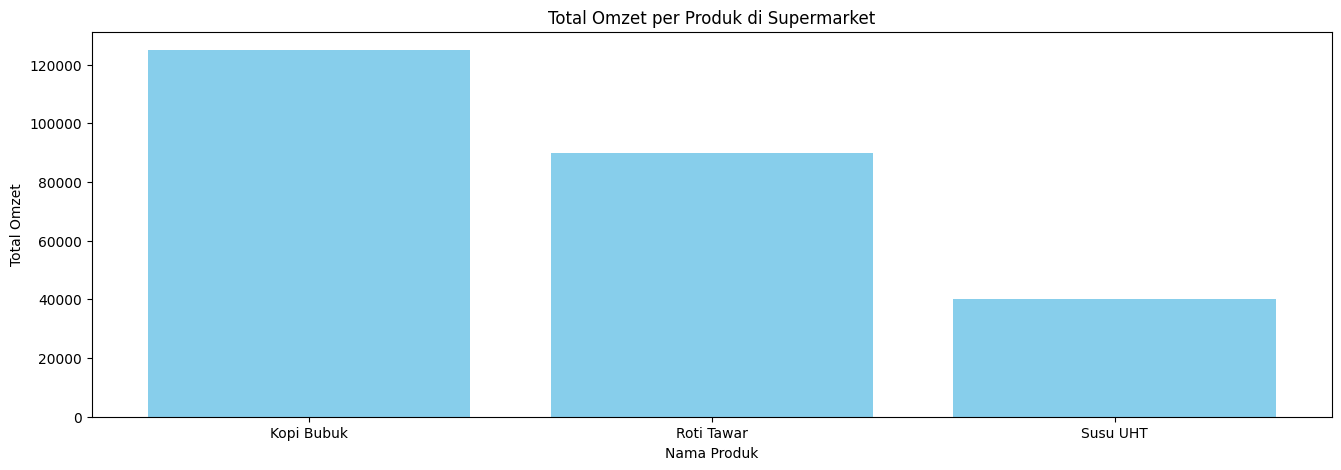

In [9]:
import matplotlib.pyplot as plt
# Visualisasi Total Omzet per Produk
plt.figure(figsize=(16, 5))
plt.bar(total_omzet_per_produk['nama_produk'], total_omzet_per_produk['subtotal'], color='skyblue')
plt.xlabel('Nama Produk')
plt.ylabel('Total Omzet')
plt.title('Total Omzet per Produk di Supermarket')
plt.show()